# Interpolacija splajnovima (nastavak)



Biti će nam potrebne funkcije za trješavanje sustava sa trodijagonalnom matricom

In [1]:
def LUdecomptridiagonal(a,b,c):
    n=len(b)
    for k in range(1,n):
        mu=a[k-1]/b[k-1]
        b[k]=b[k]-mu*c[k-1]
        a[k-1]=mu
    return a,b,c

def LUsolvetridiagonal(a,b,c,f):
    n=len(b)
    for k in range(1,n):
        f[k]=f[k]-a[k-1]*f[k-1]
    f[n-1]=f[n-1]/b[n-1]
    for k in range(n-2,-1,-1):
        f[k]=(f[k]-c[k]*f[k+1])/b[k]
    return f



U sljedećem kodu računamo koeficijente $\gamma$ za prirodni kubični splajn koji interpolira podatke xData i yData te potom računamo vrijednost s(1.5). Za to je potrebno izračunati pripadne koeficijente polinoma na segmentu gdje se točka nalazi. Ručni račun za ovaj primjer možete pronaći u videu. a dio implementacije je preuzet iz literature

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

xData=np.array([1 ,2 , 3, 4, 5])
yData=np.array([0,1, 0, 1, 0])

def gamma_calc(xData,yData):
    n=len(xData)-1
    lower_diag=np.zeros(n)
    main_diag=np.ones(n+1)
    upper_diag=np.zeros(n)
    gamma=np.zeros(n+1)
    lower_diag[0:n-1]=xData[0:n-1]-xData[1:n]
    main_diag[1:n]=2.0*(xData[0:n-1]-xData[2:n+1])
    upper_diag[1:n]=xData[1:n]-xData[2:n+1]
    gamma[1:n] =6.0*(yData[0:n-1]-yData[1:n])/(xData[0:n-1] - xData[1:n])-6.0*(yData[1:n] - yData[2:n+1])/(xData[1:n] - xData[2:n+1])
    LUdecomptridiagonal(lower_diag,main_diag,upper_diag)
    LUsolvetridiagonal(lower_diag,main_diag,upper_diag,gamma)
    return gamma

def evalSpline(xData,yData,k,x):
    def findSegment(xData,x):
        iLeft = 0
        iRight = len(xData)- 1
        while 1:
            if (iRight-iLeft)<= 1: return iLeft
            i =int((iLeft + iRight)/2)
            if x < xData[i]: iRight = i
            else: iLeft = i
    i = findSegment(xData,x)
    h = xData[i] - xData[i+1]
    y = ((x - xData[i+1])**3/h - (x - xData[i+1])*h)*k[i]/6.0 - ((x - xData[i])**3/h - (x - xData[i])*h)*k[i+1]/6.0 + (yData[i]*(x - xData[i+1])- yData[i+1]*(x - xData[i]))/h
    return y

gamma=gamma_calc(xData,yData)
evalSpline(xData,yData,gamma,1.5)


0.7678571428571428

U sljedećem dijelu predavanja riješit ćemo nekoliko zadataka vezano za interpolaciju splajnovima.

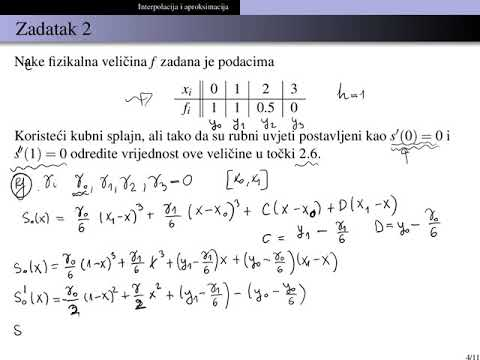

In [3]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("G514F-IcDvI")
display(vid)

U sljedećem dijelu predavanja uvodimo važna svojstva kubičnog splajna.

*Literatura po kojoj je izrađen dio predavanja: Jan Kiussalas: Numerical methods in engineering with Python, Cambridge University press*

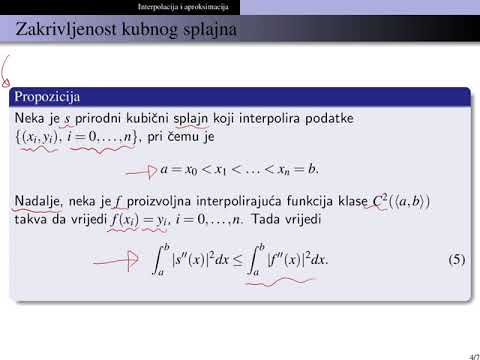

In [4]:
vid = YouTubeVideo("st8FMoM8Swo")
display(vid)

# Uvod u numeričku integraciju

U sljedećem dijelu predavanja uvodimo Newton-Cotesove formule

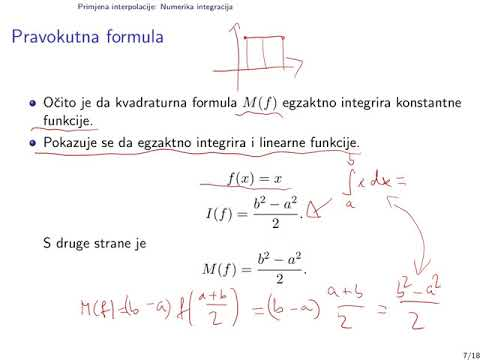

In [5]:
vid = YouTubeVideo("bzGn1Ojn4Y0")
display(vid)